#**Prediction using Supervised Machine Learning** 

###**TASK-1**

#### Predict the percentage of marks of an student based on the number of study hours
#### This is done using simple linear regression model as it involves just 2 variables,which is number of hours studied and the percentage obtained.

##STEP-I



*   We import the necessary libraries
*   we read the data and analyse it by finding its shape,size and description.
* we find out if we have any empty row, in case we have an empty row , we drop it,but since this data doesn,t have empty rows we don't need to clean the data.


In [1]:
import pandas as pd
import numpy as np
import pylab as py 
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
my_data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")
my_data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
my_data.shape

(25, 2)

In [4]:
print("Number of Dimensions present in the DataFrame:")
print(my_data.ndim)

Number of Dimensions present in the DataFrame:
2


In [5]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
my_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##STEP-II

####We plot a scatter plot to get the relation between the two variable that is available with us which are -number of hours studied and percentage obtained. 

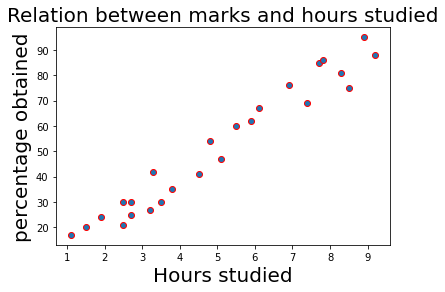

In [7]:
plt.scatter(my_data.Hours,my_data.Scores,edgecolor="red")
plt.title("Relation between marks and hours studied",size= 20)
plt.xlabel("Hours studied",size= 20)
plt.ylabel("percentage obtained",size= 20)
plt.show()

####It is clearly visible from the above graph that we have a linear relationship between the two variables.

In [8]:
X = my_data.iloc[:, :-1].values  
y = my_data.iloc[:, 1].values  

##STEP-III

####We now split our data into training and test data, so that we can tarin our data using regression model.

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.25, random_state=0) 

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


####we plot graph between the trained data and the original data to see the variation and estimate the error our tarined data has.

In [11]:
print(regressor.coef_)
print(regressor.intercept_)

[9.94167834]
1.9322042531516601


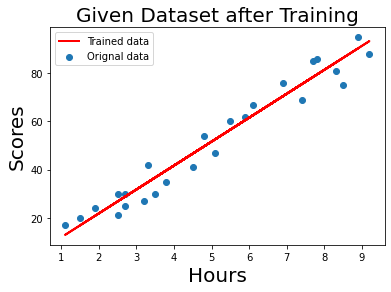

In [12]:
plt.scatter(X,y)
plt.plot(X,X*regressor.coef_ + regressor.intercept_,color ='red',alpha = 1,linewidth =2)
plt.legend(["Trained data","Orignal data"])
plt.title("Given Dataset after Training",size= 20)
plt.xlabel("Hours",size = 20)
plt.ylabel("Scores",size = 20)
plt.show()


##STEP-IV

####We noe predit scores of the and compare it with the original data.
####we can also predict scores based on our own data to check the efficiency of our model.

In [13]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [14]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


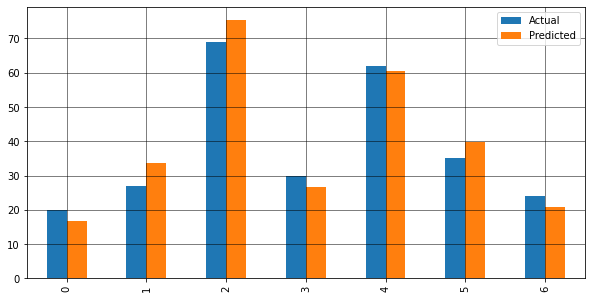

In [15]:
graph = df
graph.plot(kind='bar',figsize=(10,5))
plt.grid(which = 'both', color='black',linewidth=0.5)
plt.show()

In [16]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.89272889341652


####we calculate the error , ehich gives us an estimation of how well out model is working.
####we can split the data between test and training data differently and see how it effects our error. 

In [19]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error , mean_squared_error 
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print("Mean Squared Error: {}".format(mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.130879918502482
Mean Squared Error: 20.33292367497996
